In [2]:
import json
import pandas as pd


In [3]:
def load_C2scrape_data(path):
    try:
        fa = open(path, "r")
        df = pd.DataFrame.from_dict(json.load(fa)).T
    except:
        print("Could not load workouts data file.")
        df = None
    return df

df_athletes = load_C2scrape_data("output/C2Athletes.json")
df_extended = load_C2scrape_data("output/C2Extended.json")
df_workouts = load_C2scrape_data("output/C2Workouts.json")

In [4]:
df_athletes.index.set_names("profile_id", inplace=True)
print(df_athletes)

                         name availablity age         country        location  \
profile_id                                                                      
1157105        Benjamin Smith   available  32       Australia   Brisbane, QLD   
1120032            Jasper Liu   available  26   United States             NaN   
451524             Chris Gray   available  29   United States     Raleigh, NC   
1301914     Frederick Hancock   available  19  United Kingdom             NaN   
1189208           Itai Almogy   available  19   United States             NaN   
...                       ...         ...  ..             ...             ...   
1250363             John Oney   available  23   United States   Greenwich, OH   
737313            Alan Aikens   available  54   United States  Dorchester, MA   
1210804          George Watts   available  41   United States              UT   
1083487         Amir Mishriky   available  43           Egypt           Cairo   
1039194          HELIN GERAR

In [5]:
print(df_extended)

           age    gender weight class          country verified  \
45106891   18      Male          Lwt     United States      Yes   
51182039   42      Male          Lwt     United States      Yes   
51157298   32      Male          Lwt         Australia      Yes   
50803540   24      Male          Lwt            France      Yes   
49949686   19      Male          Lwt    United Kingdom      Yes   
...        ...       ...          ...              ...      ...   
34619955   55    Female           NaN   United Kingdom       No   
34898628   52    Female           NaN           Norway       No   
35443299   22    Female           NaN    United States       No   
34790536   27    Female           NaN    United States      Yes   
35223315   36    Female           NaN          Belgium       No   

                   type      time distance     pace  \
45106891   Indoor Rower   1:00.0      379m   1:19.1   
51182039   Indoor Rower   1:00.0      366m   1:21.9   
51157298   Indoor Rower   1:00

In [6]:
print(df_workouts)

         pos.               name age           location country  \
51157298    1     Benjamin Smith  32      Brisbane, QLD     AUS   
49949686    2  Frederick Hancock  19               None     GBR   
48271042    3         Jasper Liu  26               None     USA   
45106891    4        Itai Almogy  18               None     USA   
48223141    5         Chris Gray  29        Raleigh, NC     USA   
...       ...                ...  ..                ...     ...   
38060086   42      Steven Meador  63     Hershey 🇺🇸, PA     USA   
36865147    1      Kirsten Kline  30        Houston, TX     USA   
34894246    2        Katrin Jüch  42          Pattensen     GER   
33478889    3       Terry Laskey  64    Morrisville, VT     USA   
36343943    4           Fei Yuan  36  Fresh Meadows, NY     USA   

                                     club/affiliation distance verified  year  \
51157298                                         None      397      Yes  2021   
49949686                         

In [7]:
#get basic stats:

print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")

print("Indoor rowing machine, workouts by event:")
df_workouts_by_year_event = df_workouts[(df_workouts["rower"] == "rower") & (df_workouts["machine"] == "rower")][["event","year"]].value_counts().to_frame().sort_values(by=["event", "year"])

print(df_workouts_by_year_event)

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747
Indoor rowing machine, workouts by event:
                 0
event  year       
1      2019   2473
       2020   2680
       2021   6411
4      2019   1493
       2020   2355
       2021   2636
30     2019   7659
       2020  10468
       2021  12668
60     2019   3043
       2020   3874
       2021   5200
100    2019   2797
       2020   3247
       2021   4398
500    2019   7061
       2020   8604
       2021   8749
1000   2019  10556
       2020  12796
       2021  11007
2000   2019  15071
       2020  16457
       2021  18794
5000   2019  12346
       2020  15565
       2021  20350
6000   2019   3294
       2020   5302
       2021   6914
10000  2019   8436
       2020  10657
       2021  15163
21097  2019   3225
       2020   4144
       2021   6239
42195  2019   1083
       2020   1265
       2021   1810
100000 2019     57
       2020     75
       2021    127


<AxesSubplot:xlabel='workouts_per_athlete'>

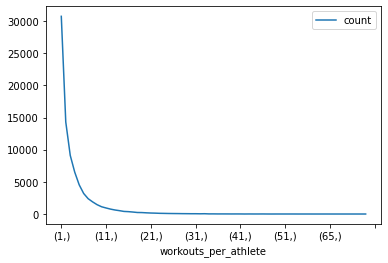

In [23]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)

#why are there less rows than workouts? Did we fail to get some athlete profiles? Can do an outer merge to find ones with empty profile data and check. Maybe profiles deleted

df_athletes_workouts[["profile_id"]].value_counts().to_frame().rename(columns={0:"workouts_per_athlete"}).value_counts().to_frame().rename(columns={0:"count"}).sort_values(by="workouts_per_athlete").plot()
